# **Social Media Usage Analysis Tool**



EDA


In [6]:
!pip install pandas seaborn matplotlib wordcloud

Importing Libraries


In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


Data loading and basic exploration

In [9]:
# Function to load and display initial dataset info
def load_and_explore_data(file_path):
    # Load the CSV file
    dataset = pd.read_csv(file_path)

    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(dataset.head())

    # Summary statistics of categorical columns
    print("\nSummary statistics:")
    print(dataset.describe(include='object'))

    # Info about the dataset, including data types and missing values
    print("\nDataset information:")
    dataset.info()

    # Check for missing values
    print("\nMissing values in each column:")
    print(dataset.isnull().sum())

    return dataset

# Load and explore the dataset
file_path = '/content/drive/MyDrive/Thesis/TFile2 - Proper_Tdata.csv'
data = load_and_explore_data(file_path)


First few rows of the dataset:
         App Time Interval                                       Side Effects  \
0   Facebook          0-30   Mild distraction, reduced productivity(Severi...   
1  Instagram          0-30   Mild distraction, fleeting envy(Severity 1 Mild)   
2    Twitter          0-30  Information overload, fleeting negativity(Seve...   
3   Snapchat          0-30   Mild distraction, fleeting FOMO(Severity 1 Mild)   
4     TikTok          0-30  Mild distraction, fleeting comparison(Severity...   

                                           Solutions  
0         Schedule short breaks, avoid notifications  
1              Limit daily use, manage notifications  
2        Avoid checking during work, curate newsfeed  
3         Manage notifications, avoid beauty filters  
4  Manage notifications, avoid algorithmic rabbit...  

Summary statistics:
              App Time Interval                                Side Effects  \
count         529           529                     

Visualizing categorical feature distributions

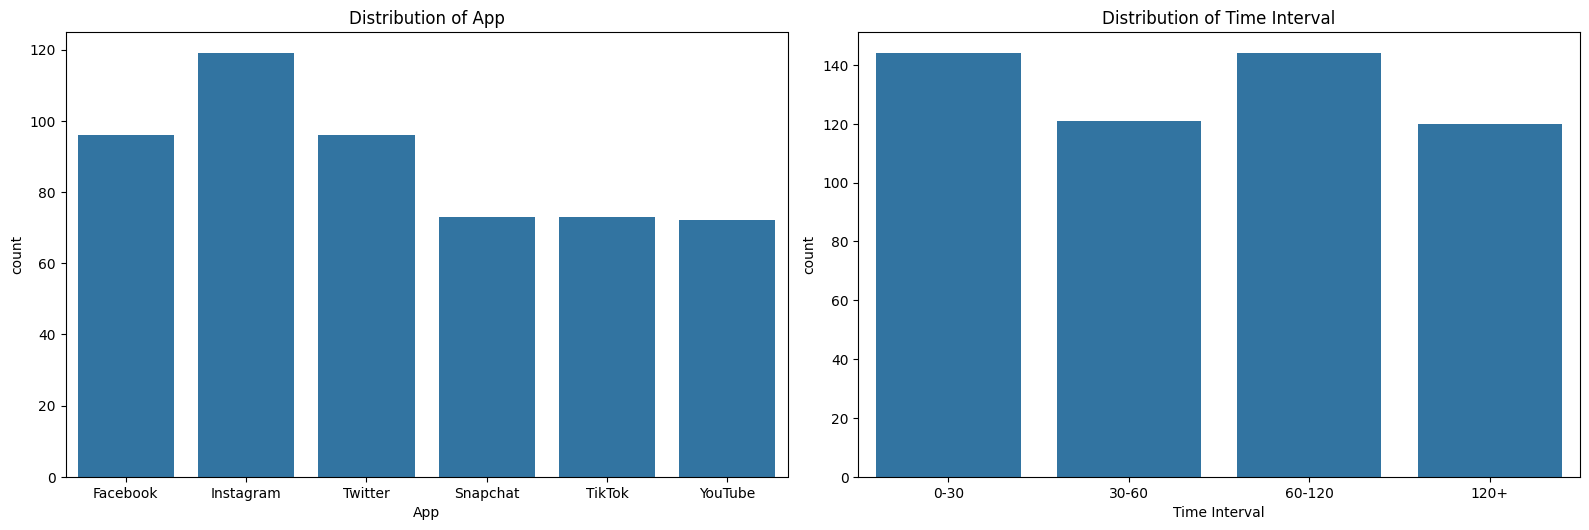

In [10]:
# Function to visualize the distribution of categorical features
def plot_categorical_distributions(data):
    plt.figure(figsize=(16, 10))

    # Distribution of 'App'
    plt.subplot(2, 2, 1)
    sns.countplot(x='App', data=data)
    plt.title('Distribution of App')

    # Distribution of 'Time Interval'
    plt.subplot(2, 2, 2)
    sns.countplot(x='Time Interval', data=data)
    plt.title('Distribution of Time Interval')

    plt.tight_layout()
    plt.show()

# Visualize the distributions
plot_categorical_distributions(data)


Visualizing word clouds for text data

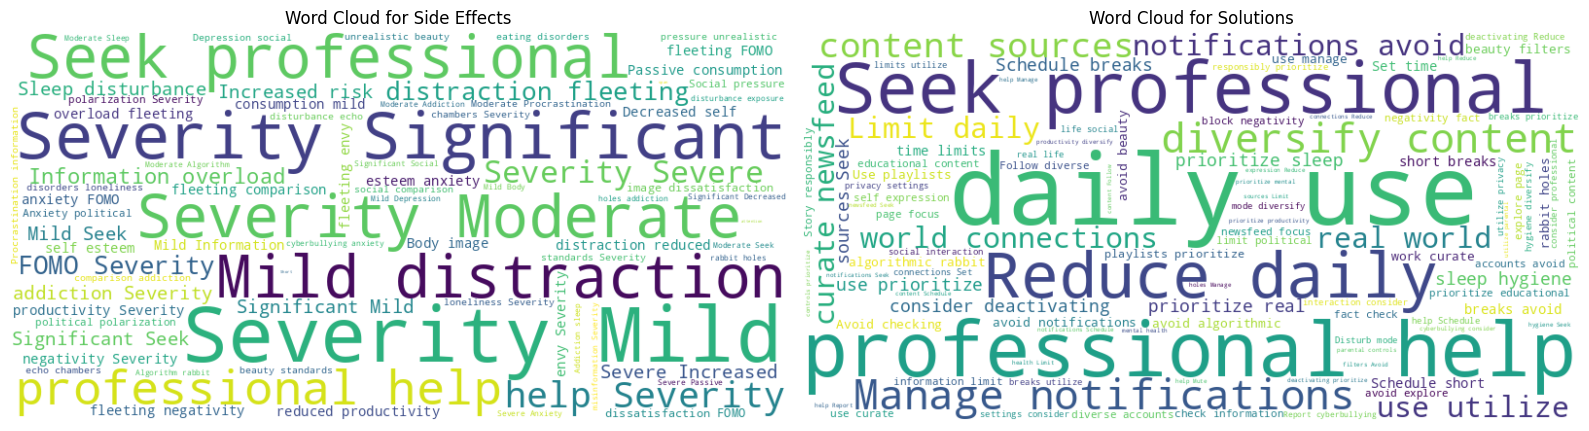

In [12]:
# Function to generate and display word clouds for 'Side Effects' and 'Solutions'
def plot_word_clouds(data, column, title):
    text = ' '.join(data[column].dropna())  # Handle missing values by dropping NaN
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

# Plot word clouds
plt.figure(figsize=(16, 8))

# Correct column names
plt.subplot(1, 2, 1)
plot_word_clouds(data, 'Side Effects', 'Word Cloud for Side Effects')

plt.subplot(1, 2, 2)
plot_word_clouds(data, 'Solutions', 'Word Cloud for Solutions')

plt.tight_layout()
plt.show()


Additional bar plots for further analysis

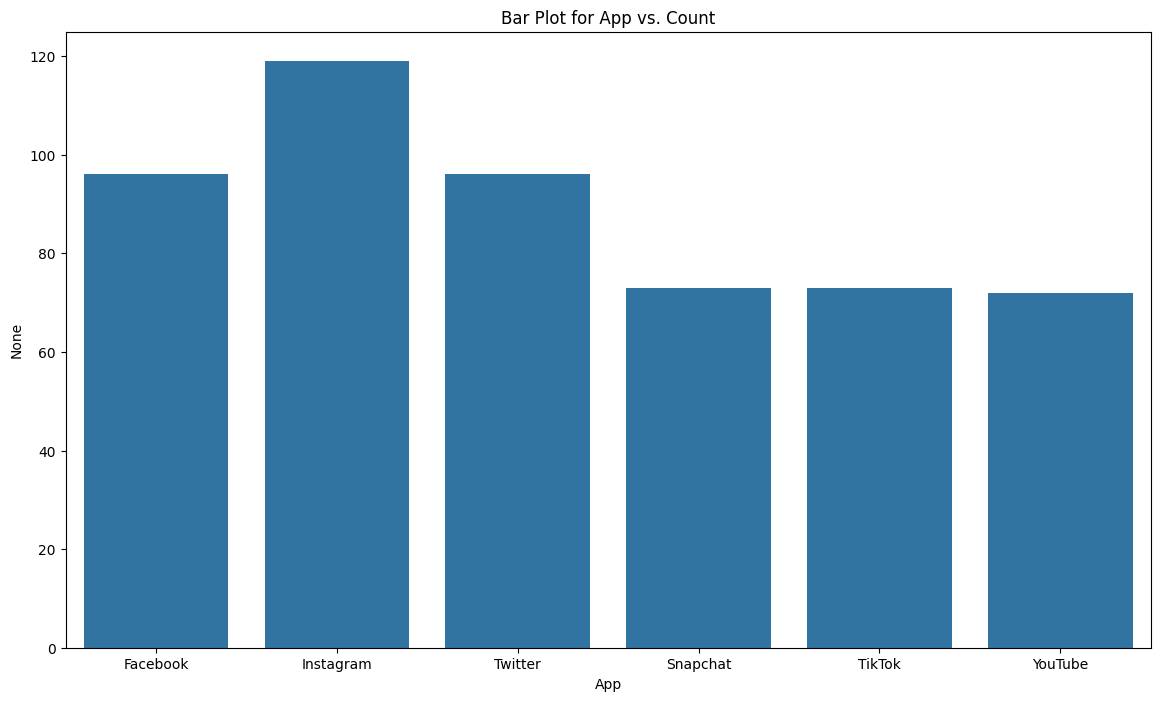

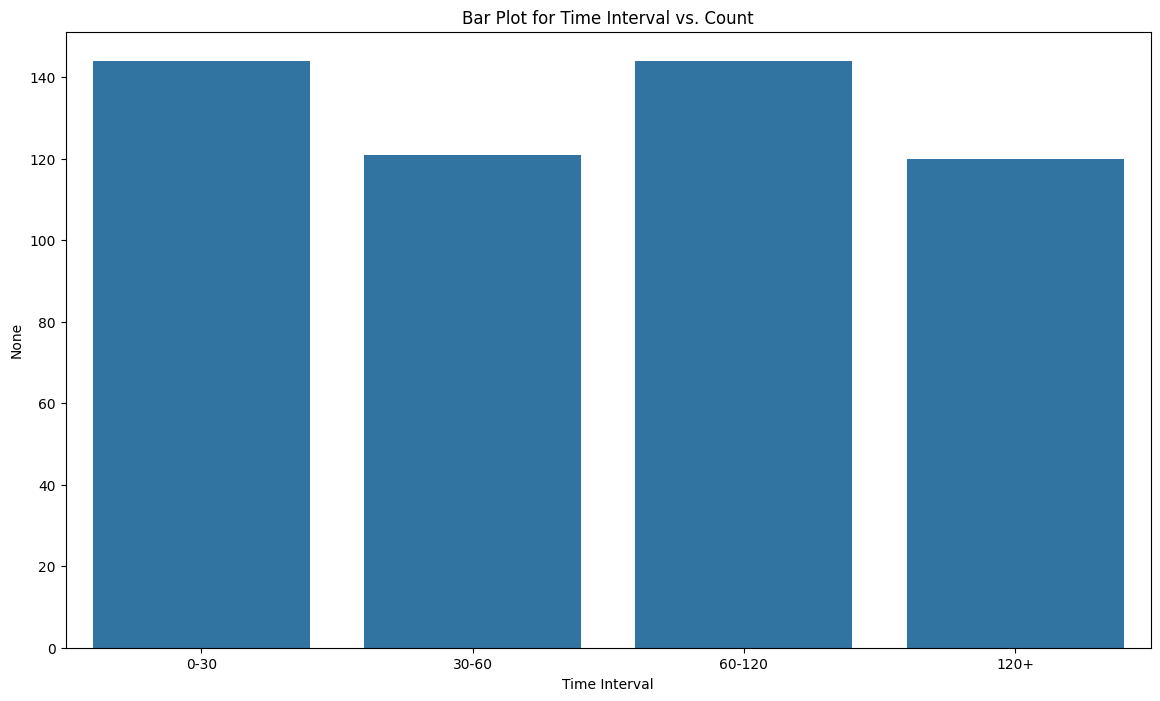

In [13]:
# Function to create bar plots for 'App' and 'Time Interval' versus count
def plot_bar_plots(data):
    plt.figure(figsize=(14, 8))

    # Bar plot for 'App' vs. count
    sns.barplot(x='App', y=data.index, data=data, estimator=len)
    plt.title('Bar Plot for App vs. Count')
    plt.show()

    # Bar plot for 'Time Interval' vs. count
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Time Interval', y=data.index, data=data, estimator=len)
    plt.title('Bar Plot for Time Interval vs. Count')
    plt.show()

# Call the function to plot bar plots
plot_bar_plots(data)


Count plots for 'Side Effects' and 'Solutions'

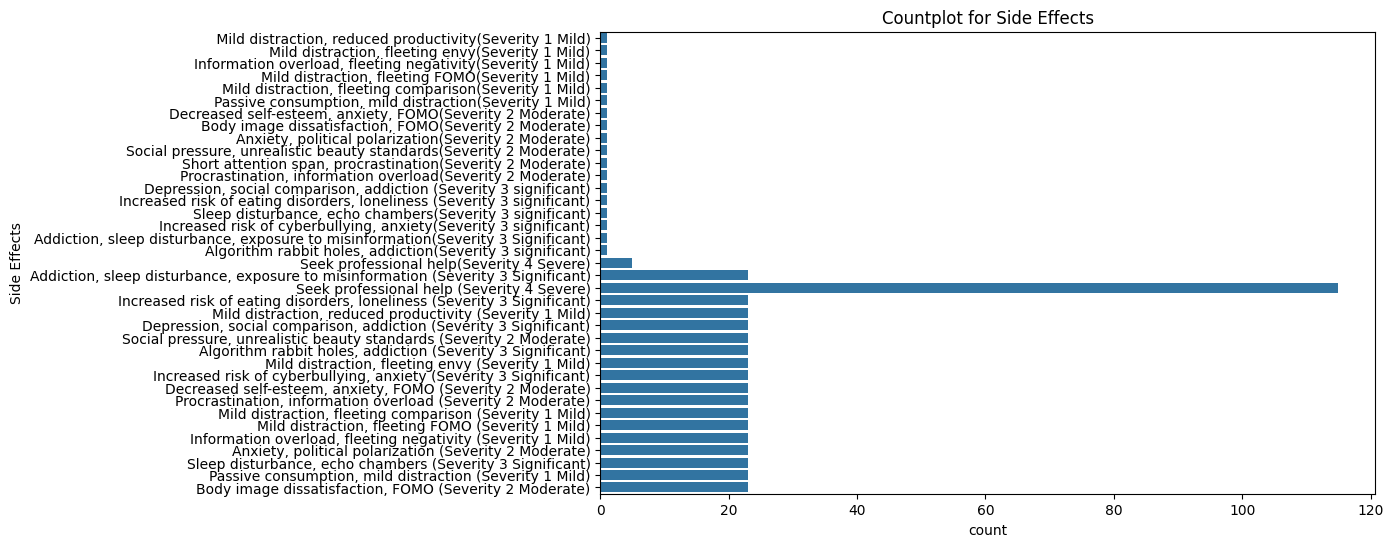

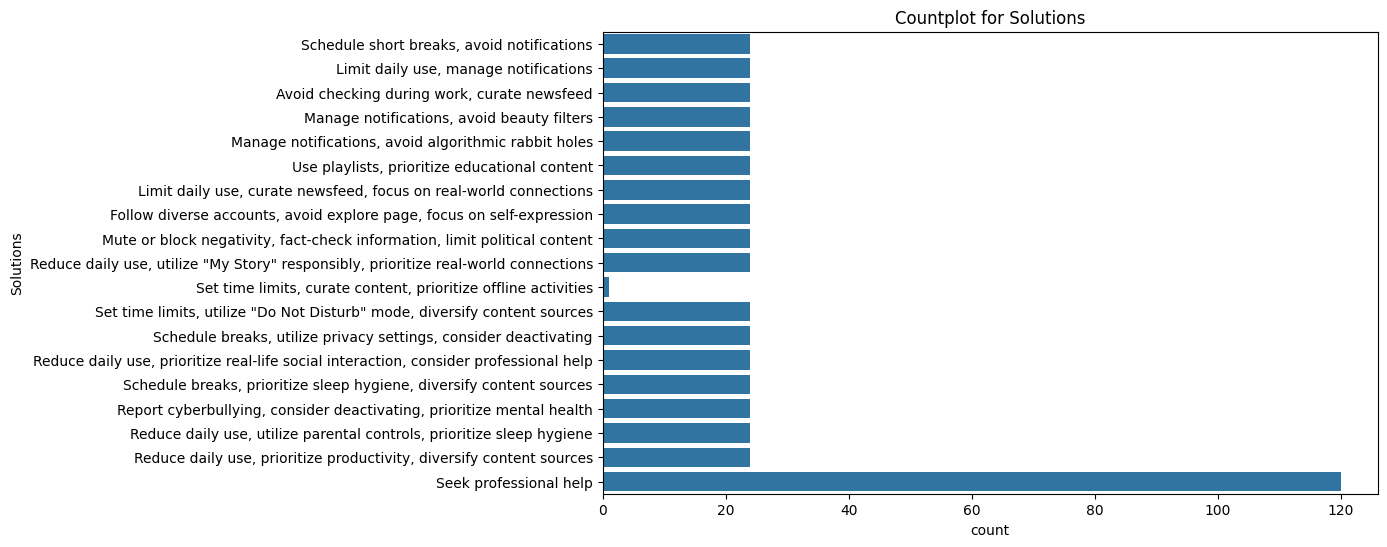

In [14]:
# Function to create count plots for 'Side Effects' and 'Solutions'
def plot_count_plots(data):
    plt.figure(figsize=(10, 6))

    # Count plot for 'Side Effects'
    sns.countplot(y='Side Effects', data=data)
    plt.title('Countplot for Side Effects')
    plt.show()

    # Count plot for 'Solutions'
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Solutions', data=data)
    plt.title('Countplot for Solutions')
    plt.show()

# Call the function to plot count plots
plot_count_plots(data)


# **Model and Application**


In [1]:
!pip install pandas numpy transformers tensorflow scikit-learn

!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 154.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from transformers import RobertaTokenizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import gradio as gr

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Thesis/TFile2 - Proper_Tdata.csv')

# Initialize label encoders for side effects and solutions
label_encoder_side_effects = LabelEncoder()
label_encoder_solutions = LabelEncoder()

# Encode the 'App' column in the dataset
df['App_encoded'] = label_encoder_side_effects.fit_transform(df['App'])

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
max_length = 128

# Function to tokenize text input
def tokenize_text(text):
    return tokenizer(text, return_tensors='tf', max_length=max_length, truncation=True, padding='max_length')

# Tokenize 'Side Effects' and 'Solutions' columns
X_side_effects = df.apply(lambda row: tokenize_text(row['Side Effects']), axis=1)
X_solutions = df.apply(lambda row: tokenize_text(row['Solutions']), axis=1)

# Encode the labels for side effects and solutions
y_side_effects = label_encoder_side_effects.fit_transform(df['Side Effects'])
y_solutions = label_encoder_solutions.fit_transform(df['Solutions'])

# Convert pandas Series of tokenized sequences to numpy array
X_side_effects = np.array([x['input_ids'][0] for x in X_side_effects])
X_solutions = np.array([x['input_ids'][0] for x in X_solutions])

# Ensure the labels are numpy arrays
y_side_effects = np.array(y_side_effects)
y_solutions = np.array(y_solutions)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Train-test split and model for Side Effects

In [3]:
# Train-test split for Side Effects
X_train_side_effects, X_test_side_effects, y_train_side_effects, y_test_side_effects = train_test_split(
    X_side_effects, y_side_effects, test_size=0.2, random_state=42)

# Build and compile the model for predicting Side Effects
def build_model_side_effects():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(label_encoder_side_effects.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model_side_effects = build_model_side_effects()

# Train the model for Side Effects
model_side_effects.fit(X_train_side_effects, y_train_side_effects, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0292 - loss: 8386.3574 - val_accuracy: 0.5647 - val_loss: 607.5173
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1512 - loss: 4012.5581 - val_accuracy: 0.7647 - val_loss: 225.0241
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2689 - loss: 2040.2802 - val_accuracy: 0.8824 - val_loss: 147.8629
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4106 - loss: 1471.5859 - val_accuracy: 0.9529 - val_loss: 103.6108
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4499 - loss: 1001.2961 - val_accuracy: 0.9412 - val_loss: 101.2780
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4877 - loss: 759.8699 - val_accuracy: 0.8706 - val_loss: 115.1623
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5216 - loss: 731.8278 - val_accuracy: 0.8706 - val_loss: 124.1629
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6130 - loss: 501.998

Train-test split and model for Solutions

In [4]:
# Train-test split for Solutions
X_train_solutions, X_test_solutions, y_train_solutions, y_test_solutions = train_test_split(
    X_solutions, y_solutions, test_size=0.2, random_state=42)

# Build and compile the model for predicting Solutions
def build_model_solutions():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(label_encoder_solutions.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model_solutions = build_model_solutions()

# Train the model for Solutions
model_solutions.fit(X_train_solutions, y_train_solutions, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.0638 - loss: 8019.7627 - val_accuracy: 0.6118 - val_loss: 695.3522
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1059 - loss: 3377.4668 - val_accuracy: 0.6824 - val_loss: 326.7972
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2797 - loss: 1904.2507 - val_accuracy: 0.8118 - val_loss: 157.3925
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4198 - loss: 1128.4240 - val_accuracy: 0.8118 - val_loss: 25.0373
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3775 - loss: 891.6622 - val_accuracy: 0.9294 - val_loss: 17.2535
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4923 - loss: 582.0227 - val_accuracy: 0.9294 - val_loss: 13.2516
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4999 - loss: 546.1757 - val_accuracy: 0.9412 - val_loss: 3.2802
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6053 - loss: 318.5811 - va

User input validation and predictions

In [5]:
# Accepted app names and time intervals
accepted_apps = ['Facebook', 'Instagram', 'YouTube', 'Snapchat', 'TikTok']
accepted_intervals = ['0-30', '30-60', '60-120', '120+']

# Function to handle user input and predictions
def predict_side_effects_solutions(user_app, user_time_interval):
    if user_app not in accepted_apps:
        return "Invalid app name. Accepted app names are: Facebook, Instagram, YouTube, Snapchat, TikTok", ""

    if user_time_interval not in accepted_intervals:
        return "Invalid time interval. Accepted time intervals are: 0-30, 30-60, 60-120, 120+", ""

    # Find the matching row based on the user input
    row = df[(df['App'] == user_app) & (df['Time Interval'] == user_time_interval)]

    if row.empty:
        return "No matching data found.", ""

    # Tokenize input data
    user_input_side_effects = tokenize_text(row['Side Effects'].iloc[0])
    user_input_solutions = tokenize_text(row['Solutions'].iloc[0])

    # Make predictions for side effects and solutions
    prediction_side_effects = model_side_effects.predict(np.array([user_input_side_effects['input_ids'][0]]))
    predicted_side_effect_index = np.argmax(prediction_side_effects)
    predicted_side_effect = label_encoder_side_effects.inverse_transform([predicted_side_effect_index])[0]

    prediction_solutions = model_solutions.predict(np.array([user_input_solutions['input_ids'][0]]))
    predicted_solution_index = np.argmax(prediction_solutions)
    predicted_solution = label_encoder_solutions.inverse_transform([predicted_solution_index])[0]

    return f"Predicted side effects for {user_app} ({user_time_interval}): {predicted_side_effect}", f"Predicted solution for {user_app} ({user_time_interval}): {predicted_solution}"

# Define Gradio interface for predictions
iface = gr.Interface(
    fn=predict_side_effects_solutions,
    inputs=["text", "text"],
    outputs=["text", "text"],
    title="Social Media Usage Analysis",
    description="Predicts side effects and solutions for a given app and time interval."
)

# Launch the Gradio interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c9ef1b4c5eaeb47231.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
